In [8]:
# =============================================================================
# Activity 2: The P-Hacking Simulator
# =============================================================================
# 
# GOAL: Discover how "researcher degrees of freedom" can lead to 
#       false discoveries even when there's NO real effect
#
# CONCEPTS: P-hacking, researcher degrees of freedom, replication crisis
#
# THE TWIST: The data below has NO real difference between groups!
#            Both are drawn from the same distribution.
#            Can you still "find" a difference?
# =============================================================================

In [9]:
# -----------------------------------------------------------------------------
# PART 1: Generate Data with NO Real Effect
# -----------------------------------------------------------------------------

set.seed(42)  # For reproducibility

# Treatment and control groups - SAME underlying distribution!
# (In reality you wouldn't know this, but we're simulating)
treatment <- rnorm(20, mean = 10, sd = 3)
control <- rnorm(20, mean = 10, sd = 3)  # SAME mean = 10!

cat("DATA GENERATED: Treatment and Control have IDENTICAL distributions\n")
cat("(But you're pretending you don't know this...)\n\n")

# First look at the data
cat("Treatment mean:", round(mean(treatment), 2), "\n")
cat("Control mean:", round(mean(control), 2), "\n")
cat("Observed difference:", round(mean(treatment) - mean(control), 2), "\n\n")

DATA GENERATED: Treatment and Control have IDENTICAL distributions
(But you're pretending you don't know this...)

Treatment mean: 10.58 
Control mean: 9.19 
Observed difference: 1.39 



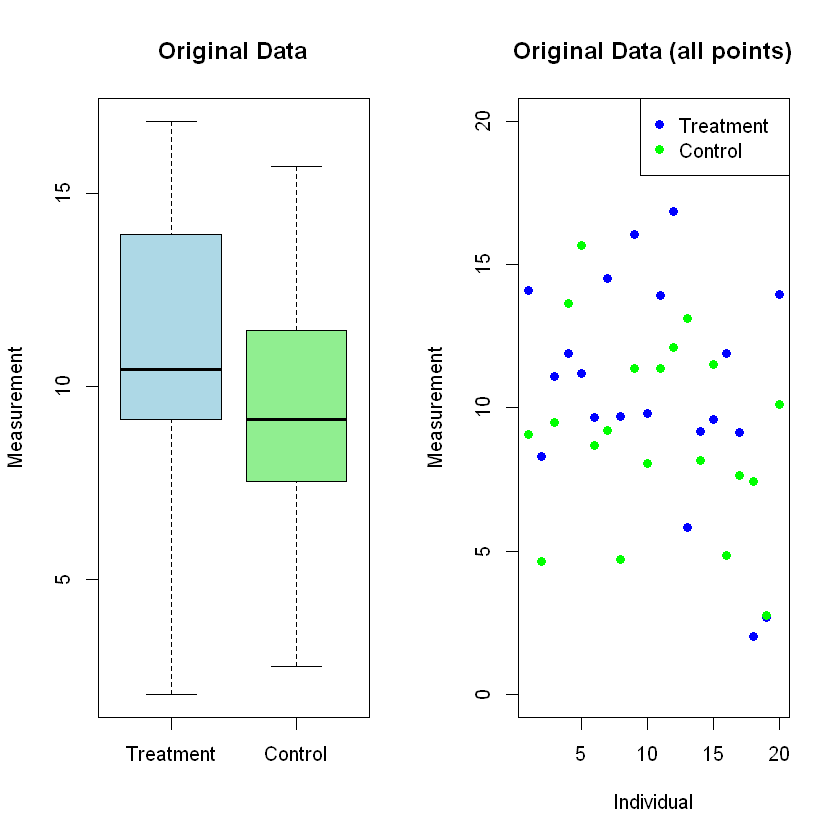

In [10]:
# -----------------------------------------------------------------------------
# PART 2: Visualize the Original Data
# -----------------------------------------------------------------------------

par(mfrow = c(1, 2))
boxplot(treatment, control, 
        names = c("Treatment", "Control"),
        main = "Original Data",
        ylab = "Measurement",
        col = c("lightblue", "lightgreen"))

plot(1:20, treatment, col = "blue", pch = 16, ylim = c(0, 20),
     xlab = "Individual", ylab = "Measurement",
     main = "Original Data (all points)")
points(1:20, control, col = "green", pch = 16)
legend("topright", c("Treatment", "Control"), 
       col = c("blue", "green"), pch = 16)

par(mfrow = c(1, 1))

In [11]:
# -----------------------------------------------------------------------------
# PART 3: Strategy 1 - Remove "Outliers"
# -----------------------------------------------------------------------------

# "These high values look suspicious... let's remove them"

treatment_clean1 <- treatment[treatment < 15]  # Remove values > 15
control_clean1 <- control[control < 15]

cat("\nSTRATEGY 1: Remove outliers (values > 15)\n")
cat("Treatment mean (cleaned):", round(mean(treatment_clean1), 2), "\n")
cat("Control mean (cleaned):", round(mean(control_clean1), 2), "\n")
cat("NEW difference:", round(mean(treatment_clean1) - mean(control_clean1), 2), "\n")
cat("Sample sizes: Treatment n =", length(treatment_clean1), 
    ", Control n =", length(control_clean1), "\n\n")


STRATEGY 1: Remove outliers (values > 15)
Treatment mean (cleaned): 9.92 
Control mean (cleaned): 8.84 
NEW difference: 1.08 
Sample sizes: Treatment n = 18 , Control n = 19 



In [12]:
# -----------------------------------------------------------------------------
# PART 4: Strategy 2 - Different Outlier Threshold
# -----------------------------------------------------------------------------

# "Maybe 15 was too strict... let's try 16"

treatment_clean2 <- treatment[treatment < 16]
control_clean2 <- control[control < 16]

cat("STRATEGY 2: Remove outliers (values > 16)\n")
cat("Treatment mean (cleaned):", round(mean(treatment_clean2), 2), "\n")
cat("Control mean (cleaned):", round(mean(control_clean2), 2), "\n")
cat("NEW difference:", round(mean(treatment_clean2) - mean(control_clean2), 2), "\n\n")

STRATEGY 2: Remove outliers (values > 16)
Treatment mean (cleaned): 9.92 
Control mean (cleaned): 9.19 
NEW difference: 0.74 



In [13]:
# -----------------------------------------------------------------------------
# PART 5: Strategy 3 - Log Transformation
# -----------------------------------------------------------------------------

# "The data might be skewed... let's log-transform"

treatment_log <- log(treatment)
control_log <- log(control)

cat("STRATEGY 3: Log transformation\n")
cat("Treatment mean (log):", round(mean(treatment_log), 2), "\n")
cat("Control mean (log):", round(mean(control_log), 2), "\n")
cat("Difference:", round(exp(mean(treatment_log) - mean(control_log)), 2), "\n\n")

STRATEGY 3: Log transformation
Treatment mean (log): 2.25 
Control mean (log): 2.14 
Difference: 1.12 



In [19]:
# -----------------------------------------------------------------------------
# PART 6: Strategy 4 - Square Root Transformation
# -----------------------------------------------------------------------------

# "Maybe log is too strong... let's try square root"

treatment_sqrt <- sqrt(treatment)
control_sqrt <- sqrt(control)

cat("STRATEGY 4: Square root transformation\n")
cat("Treatment mean (sqrt):", round(mean(treatment_sqrt), 2), "\n")
cat("Control mean (sqrt):", round(mean(control_sqrt), 2), "\n")
cat("Difference:", round(((mean(treatment_sqrt) - mean(control_sqrt))^2), 2), "\n\n")

STRATEGY 4: Square root transformation
Treatment mean (sqrt): 3.18 
Control mean (sqrt): 2.98 
Difference: 0.04 



In [20]:
# -----------------------------------------------------------------------------
# PART 7: Strategy 5 - Remove Bottom Outliers Instead
# -----------------------------------------------------------------------------

# "Wait, what about LOW outliers?"

treatment_clean3 <- treatment[treatment > 5]
control_clean3 <- control[control > 5]

cat("STRATEGY 5: Remove low values (< 5)\n")
cat("Treatment mean:", round(mean(treatment_clean3), 2), "\n")
cat("Control mean:", round(mean(control_clean3), 2), "\n")
cat("Difference:", round(mean(treatment_clean3) - mean(control_clean3), 2), "\n\n")

STRATEGY 5: Remove low values (< 5)
Treatment mean: 11.49 
Control mean: 10.42 
Difference: 1.07 



In [21]:
# -----------------------------------------------------------------------------
# PART 8: Strategy 6 - Use Median Instead
# -----------------------------------------------------------------------------

# "Maybe the mean isn't appropriate... let's use median"

cat("STRATEGY 6: Use median instead of mean\n")
cat("Treatment median:", round(median(treatment), 2), "\n")
cat("Control median:", round(median(control), 2), "\n")
cat("Difference:", round(median(treatment) - median(control), 2), "\n\n")

STRATEGY 6: Use median instead of mean
Treatment median: 10.45 
Control median: 9.15 
Difference: 1.3 



In [24]:
# -----------------------------------------------------------------------------
# PART 9: YOUR TURN - Find More "Researcher Degrees of Freedom"
# -----------------------------------------------------------------------------

# TODO: Can you find other ways to manipulate the data?
# Try:
# - Removing different numbers of "outliers" from each group
# - Using different percentiles (10th, 90th, etc.)
# - Standardizing the data
# - Focusing on just the first 10 observations from each
# - Any other transformation you can think of!

# Example template:
# treatment_new <- YOUR_MODIFICATION_HERE
# control_new <- YOUR_MODIFICATION_HERE
# cat("Difference:", round(mean(treatment_new) - mean(control_new), 2), "\n")


SUMMARY OF ALL STRATEGIES:
1. Original       : Difference =  1.39
2. Remove >15     : Difference =  1.08
3. Remove >16     : Difference =  0.74
4. Log transform  : Difference =  0.11
5. Sqrt transform : Difference =  0.20
6. Remove <5      : Difference =  1.07
7. Median         : Difference =  1.30

Largest difference found: 1.39 
Remember: TRUE difference = 0.00


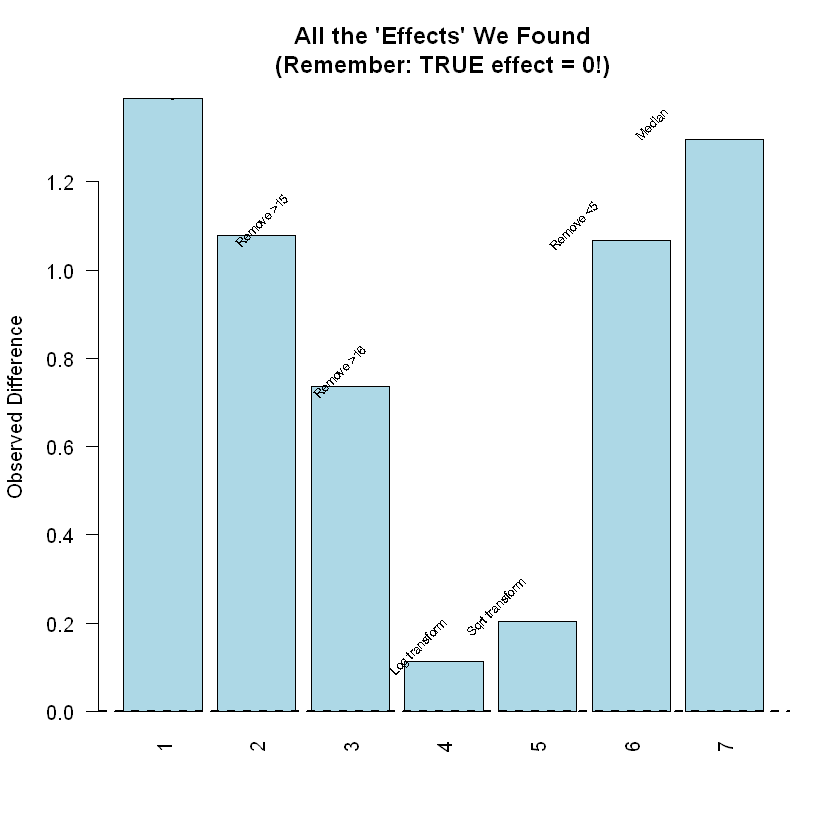

In [25]:
# -----------------------------------------------------------------------------
# PART 10: Summary - How Many Ways Did We Analyze This?
# -----------------------------------------------------------------------------

# Let's collect all the differences we found
all_differences <- c(
  mean(treatment) - mean(control),  # Original
  mean(treatment_clean1) - mean(control_clean1),  # Strategy 1
  mean(treatment_clean2) - mean(control_clean2),  # Strategy 2
  mean(treatment_log) - mean(control_log),  # Strategy 3
  mean(treatment_sqrt) - mean(control_sqrt),  # Strategy 4
  mean(treatment_clean3) - mean(control_clean3),  # Strategy 5
  median(treatment) - median(control)  # Strategy 6
)

strategy_names <- c("Original", "Remove >15", "Remove >16", 
                   "Log transform", "Sqrt transform", "Remove <5", "Median")

# Plot all the "effects" we found
barplot(all_differences, 
        names.arg = 1:7,
        main = "All the 'Effects' We Found\n(Remember: TRUE effect = 0!)",
        ylab = "Observed Difference",
        col = ifelse(all_differences > 0, "lightblue", "lightcoral"),
        las = 2)
abline(h = 0, lwd = 2, lty = 2)
text(1:7, all_differences, strategy_names, pos = 3, cex = 0.6, srt = 45)

cat("\nSUMMARY OF ALL STRATEGIES:\n")
for (i in 1:length(all_differences)) {
  cat(sprintf("%d. %-15s: Difference = %5.2f\n", 
              i, strategy_names[i], all_differences[i]))
}

cat("\nLargest difference found:", round(max(abs(all_differences)), 2), "\n")
cat("Remember: TRUE difference = 0.00\n")

In [26]:
# -----------------------------------------------------------------------------
# PART 11: The Probability of False Discovery
# -----------------------------------------------------------------------------

# If we try enough things, we'll eventually find something that looks 
# "significant" by chance alone!

# Simulate: what if 100 researchers all did this with NULL data
# and each tried 10 different analyses?

n_researchers <- 100
analyses_per_researcher <- 10

false_discoveries <- 0

for (researcher in 1:n_researchers) {
  # Generate NULL data (no real effect)
  t <- rnorm(20, mean = 10, sd = 3)
  c <- rnorm(20, mean = 10, sd = 3)
  
  # Try multiple analyses
  for (analysis in 1:analyses_per_researcher) {
    # Random choice of what to do
    choice <- sample(1:3, 1)
    
    if (choice == 1) {
      # Remove some "outliers"
      threshold <- runif(1, 14, 16)
      t_clean <- t[t < threshold]
      c_clean <- c[c < threshold]
      diff <- mean(t_clean) - mean(c_clean)
    } else if (choice == 2) {
      # Transform
      diff <- mean(log(t)) - mean(log(c))
    } else {
      # Use median
      diff <- median(t) - median(c)
    }
    
    # Check if "significant" (rough threshold)
    if (abs(diff) > 1) {  # Arbitrary threshold
      false_discoveries <- false_discoveries + 1
      break  # This researcher stops and publishes!
    }
  }
}

cat("\n\nSIMULATION: 100 researchers, each trying 10 analyses on NULL data\n")
cat("Number who found 'significant' result:", false_discoveries, "\n")
cat("False discovery rate:", round(false_discoveries / n_researchers * 100, 1), "%\n")



SIMULATION: 100 researchers, each trying 10 analyses on NULL data
Number who found 'significant' result: 51 
False discovery rate: 51 %



SUMMARY OF ALL STRATEGIES:
1. Original       : Difference =  1.39
2. Remove >15     : Difference =  1.08
3. Remove >16     : Difference =  0.74
4. Log transform  : Difference =  0.11
5. Sqrt transform : Difference =  0.20
6. Remove <5      : Difference =  1.07
7. Median         : Difference =  1.30

Largest difference found: 1.39 
Remember: TRUE difference = 0.00


SIMULATION: 100 researchers, each trying 10 analyses on NULL data
Number who found 'significant' result: 50 
False discovery rate: 50 %


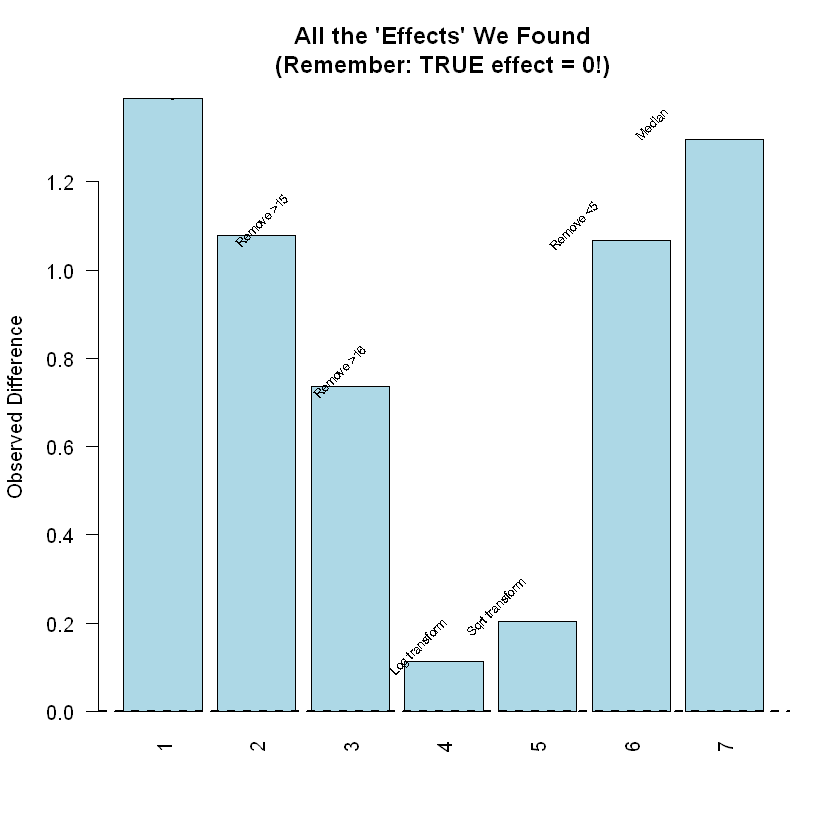

In [23]:
# -----------------------------------------------------------------------------
# DISCUSSION QUESTIONS
# -----------------------------------------------------------------------------
#
# 1. How many different analysis strategies did we try? How many more could
#    you think of?
#
# 2. Even though the TRUE effect was zero, we found some large differences.
#    How did this happen?
#
# 3. If you tried 20 different analyses and reported only the one with the
#    biggest difference, is this honest? What's wrong with this?
#
# 4. How does PRE-REGISTRATION solve this problem?
#
# 5. What if you genuinely didn't know which analysis was "correct" before
#    seeing the data? What should you do?
#
# 6. Real scenario: You analyze your data and find p = 0.30 (not significant).
#    Then you try removing one outlier and get p = 0.04 (significant!).
#    What should you report?
#
# =============================================================================